In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import Preprocessing 
from sklearn.model_selection import train_test_split as tts
from sklearn.feature_extraction.text import TfidfVectorizer as tfidf
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve

In [2]:
df=pd.read_csv(r"D:\Work\Class\Seminar\Propaganda_Dataset_tweets.csv")

In [3]:
df.columns=["Source","Indicator","Tweet"]

In [4]:
Tweet=df['Tweet'].values

In [5]:
Ind=df['Indicator'].values

In [6]:
for i in range(len(Tweet)):
    Tweet[i]=Preprocessing.remove_unwanted(Tweet[i])
    Tweet[i]=Preprocessing.remove_stopwords( Tweet[i])    
    #Tweet[i]=Preprocessing.common_words(Tweet[i])
    Tweet[i]=Preprocessing.remove_punctuations(Tweet[i])
    Tweet[i]=Preprocessing.lemma(Tweet[i])
    Tweet[i]=Preprocessing.convert_to_single_string(Tweet[i])

In [7]:
X_train,X_test,y_train,y_test=tts(Tweet,Ind,test_size=0.2)

In [8]:
tfidf = tfidf(use_idf=True,sublinear_tf=True)
tfidf_train = tfidf.fit_transform(X_train)
tfidf_test  = tfidf.transform(X_test)

In [9]:
RFC=RandomForestClassifier(n_estimators=1000,max_depth=10,random_state=1)

In [10]:
RFC.fit(tfidf_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=1)

In [11]:
scores=cross_val_score(RFC,tfidf_train,y_train,scoring="accuracy",cv=5)

In [12]:
print(scores)

[0.77859135 0.76185495 0.76220363 0.76290098 0.75383543]


In [13]:
pred=RFC.predict(tfidf_test)

In [14]:
proba=RFC.predict_proba(tfidf_test)[:,1]

In [15]:
print(classification_report(y_test,pred))
print('Confusion Matrix:',confusion_matrix(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, proba)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.71      0.91      0.80      1808
           1       0.87      0.62      0.73      1777

    accuracy                           0.77      3585
   macro avg       0.79      0.77      0.76      3585
weighted avg       0.79      0.77      0.76      3585

Confusion Matrix: [[1644  164]
 [ 671 1106]]
AUC: 0.864033607900359


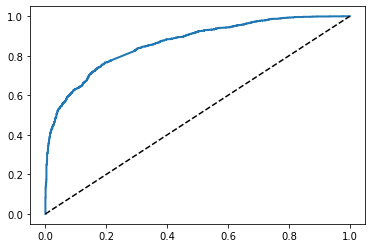

In [16]:
def plot_roc_curve(fpr,tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
plot_roc_curve(fpr,tpr)
plt.savefig("ROC_Curve_RFC_Prop")
plt.show()